# Project : IMDB BOX OFFICE PREDICTION
# DOMAIN : MACHINE LEARNING USING PYTHON
# Algorithms : Support Vector Machine, Artifical Neural Network

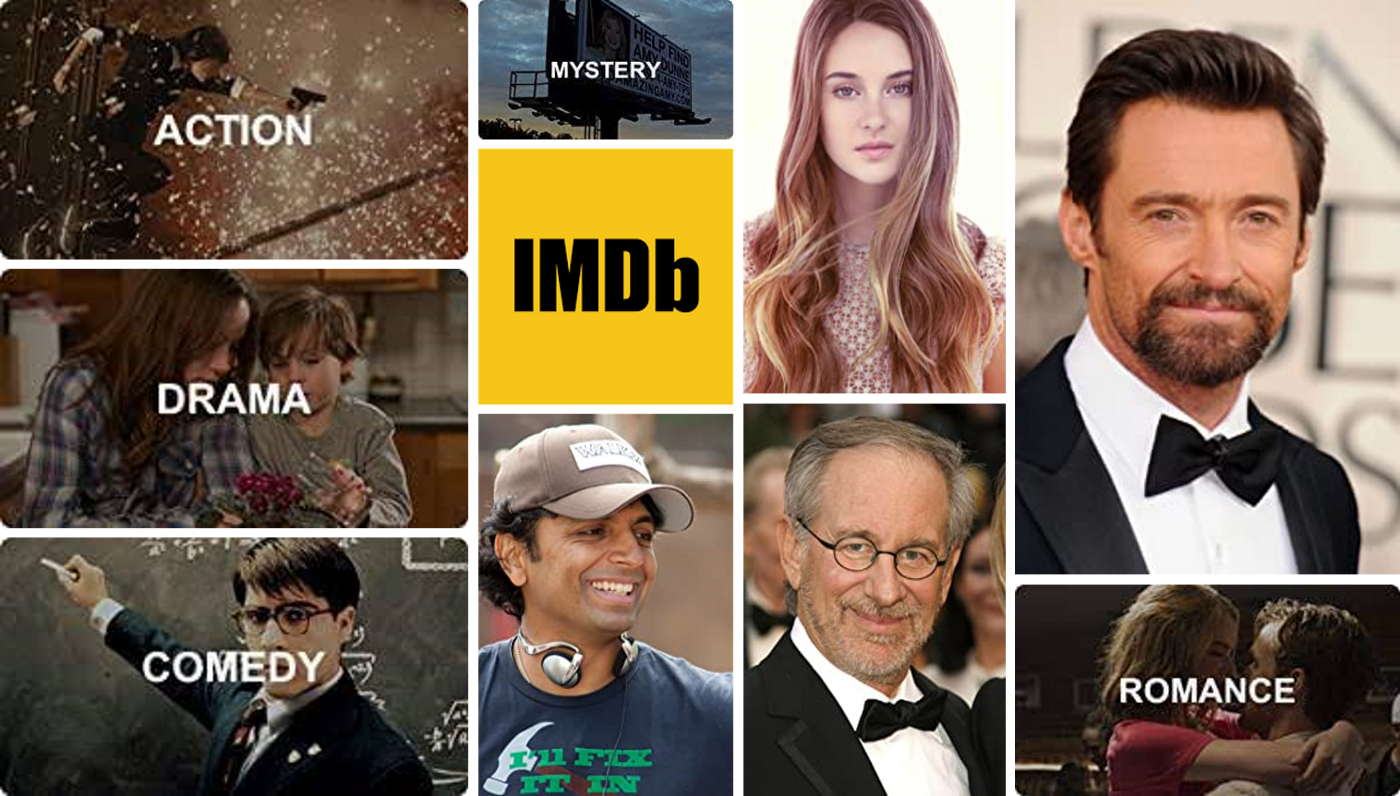

## Importing necessary libraries

In [1]:
# for ploting graph.
from matplotlib import pyplot as plt
%matplotlib inline

# for data visualizations.
import seaborn as sns

# for reading dataset file.
import pandas as pd

# for numerical calculations.
import numpy as np

# for converting the labels into a numeric form so as to convert them into the machine-readable form.
from sklearn.preprocessing import LabelEncoder

# for Splitting the data into Training and Test set
from sklearn.model_selection import train_test_split
from sklearn import metrics

# for SVC model
from sklearn.svm import SVC

In [2]:
#Importing data file and selecting relevant variables
df=pd.read_csv('IMDb.csv')

my_cols=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
df=df[my_cols]
df.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,Action,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,Action,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,Action,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,Action,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,Documentary,NaN,NaN,NaN,8,7.1


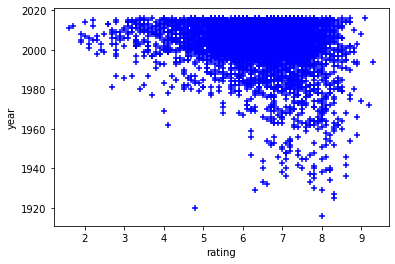

In [3]:
# to plot a scatter plot for rating vs year
plt.xlabel('rating')
plt.ylabel('year')
plt.scatter(df['rating'], df['year'], color="blue", marker='+')

In [4]:
#Summary of missing values
df.isnull().sum()

castTotalLikes      0
directorLikes     104
actor1likes         7
movieLikes          0
fbPosters          13
year              108
duration           15
genre               0
contentRating     303
criticReviews      50
userReviews        21
userVotes           0
rating              0
dtype: int64

In [5]:
# To make round off for null values in any field in the table.
df=df.dropna()
df.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,criticReviews,userReviews,userVotes,rating
count,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0
mean,10212.4,723.1,6883.4,7991.4,1.4,2002.1,108.8,148.9,291.4,89859.8,6.4
std,17929.4,2883.5,14600.7,19831.7,2.0,12.5,22.2,121.1,386.2,142162.3,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,20.0,1.0,1.0,6.0,1.6
25%,1576.0,9.0,656.0,0.0,0.0,1999.0,94.0,61.0,80.0,11798.0,5.8
50%,3317.0,54.0,1000.0,181.0,1.0,2005.0,104.0,120.0,173.0,39956.0,6.5
75%,14638.0,212.0,12000.0,6000.0,2.0,2010.0,118.0,204.0,346.0,104481.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,813.0,5060.0,1689764.0,9.3


In [6]:
df.corr().round(3)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.122,0.947,0.216,0.086,0.127,0.130,0.265,0.205,0.269,0.100
directorLikes,0.122,1.000,0.095,0.161,-0.043,-0.060,0.177,0.177,0.219,0.295,0.180
actor1likes,0.947,0.095,1.000,0.141,0.064,0.100,0.093,0.194,0.146,0.198,0.089
movieLikes,0.216,0.161,0.141,1.000,0.011,0.238,0.214,0.690,0.391,0.530,0.261
fbPosters,0.086,-0.043,0.064,0.011,1.000,0.062,0.022,-0.033,-0.072,-0.027,-0.072
year,0.127,-0.060,0.100,0.238,0.062,1.000,-0.127,0.319,0.017,0.027,-0.214
duration,0.130,0.177,0.093,0.214,0.022,-0.127,1.000,0.245,0.353,0.341,0.363
criticReviews,0.265,0.177,0.194,0.690,-0.033,0.319,0.245,1.000,0.594,0.614,0.342
userReviews,0.205,0.219,0.146,0.391,-0.072,0.017,0.353,0.594,1.000,0.793,0.316
userVotes,0.269,0.295,0.198,0.530,-0.027,0.027,0.341,0.614,0.793,1.000,0.443


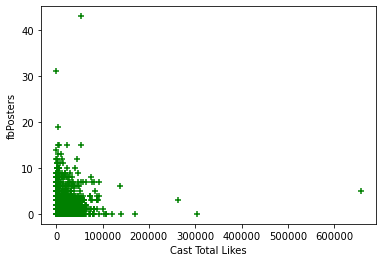

In [7]:
# to plot for castTotalLikes vs fbPosters
plt.xlabel('Cast Total Likes')
plt.ylabel('fbPosters')
plt.scatter(df['castTotalLikes'],df['fbPosters'], color="green" , marker="+")
plt.show()

In [8]:
le = LabelEncoder()

In [9]:
df['genre']=le.fit_transform(df['genre'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,PG-13,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,PG-13,462.0,738.0,212204,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,0,0.0,0.0,74,0.0,2005.0,80.0,17,Not Rated,35.0,35.0,589,6.3
5035,147,0.0,121.0,0,0.0,1992.0,81.0,0,R,56.0,130.0,52055,6.9
5037,690,0.0,296.0,413,1.0,2011.0,95.0,4,Not Rated,14.0,14.0,1338,6.4
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,PG-13,14.0,9.0,1255,6.3


In [10]:
df['contentRating']=le.fit_transform(df['contentRating'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,7,462.0,738.0,212204,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,0,0.0,0.0,74,0.0,2005.0,80.0,17,5,35.0,35.0,589,6.3
5035,147,0.0,121.0,0,0.0,1992.0,81.0,0,9,56.0,130.0,52055,6.9
5037,690,0.0,296.0,413,1.0,2011.0,95.0,4,5,14.0,14.0,1338,6.4
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,7,14.0,9.0,1255,6.3


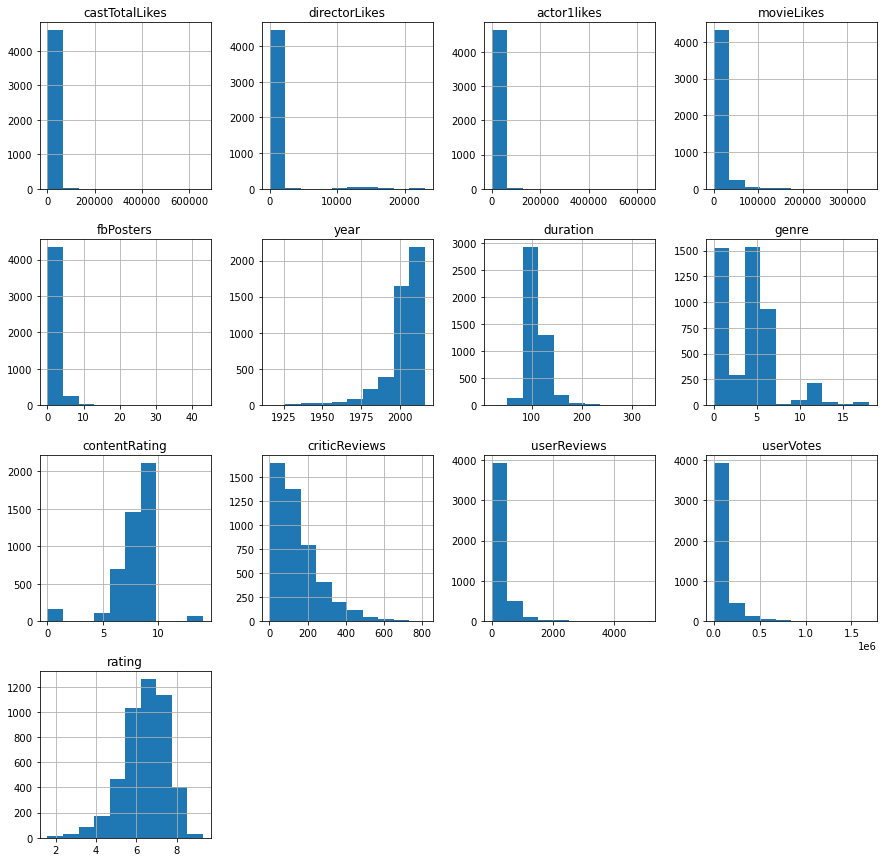

In [11]:
pd.DataFrame.hist(df,figsize=[15,15]);

# Run Support Vector Machine Model

In [12]:
df.head(50)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,7,462.0,738.0,212204,6.6
6,46055,0.0,24000.0,0,0.0,2007.0,156.0,0,7,392.0,1902.0,383056,6.2
7,2036,15.0,799.0,29000,1.0,2010.0,100.0,1,6,324.0,387.0,294810,7.8
8,92000,0.0,26000.0,118000,4.0,2015.0,141.0,0,7,635.0,1117.0,462669,7.5
9,58753,282.0,25000.0,10000,3.0,2009.0,153.0,1,6,375.0,973.0,321795,7.5
10,24450,0.0,15000.0,197000,0.0,2016.0,183.0,0,7,673.0,3018.0,371639,6.9


In [13]:
df[50:100]

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
51,16149,179.0,15000.0,23000,2.0,2010.0,116.0,0,7,306.0,453.0,222403,6.6
52,19166,0.0,16000.0,83000,0.0,2013.0,131.0,0,7,575.0,1106.0,381148,7.0
53,2593,0.0,894.0,46000,2.0,2011.0,154.0,0,7,428.0,899.0,326180,6.3
54,14959,14000.0,11000.0,5000,2.0,2008.0,122.0,0,7,470.0,2054.0,333847,6.2
55,696,113.0,275.0,20000,0.0,2015.0,93.0,1,6,298.0,345.0,62836,6.8
56,5005,56.0,2000.0,39000,0.0,2012.0,93.0,1,6,488.0,428.0,273556,7.2
57,1327,681.0,998.0,30000,4.0,2016.0,122.0,0,7,322.0,432.0,53607,7.5
58,2975,475.0,1000.0,16000,0.0,2008.0,98.0,1,1,421.0,1043.0,718837,8.4
59,1125,420.0,268.0,0,2.0,2007.0,91.0,0,7,162.0,221.0,121084,6.2
60,2144,776.0,1000.0,13000,0.0,2009.0,158.0,0,7,367.0,1055.0,283418,5.8


In [14]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

### To plot graph for rating vs year

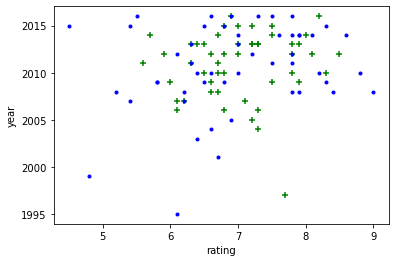

In [15]:
plt.xlabel('rating')
plt.ylabel('year')
plt.scatter(df0['rating'], df0['year'], color="green", marker='+')
plt.scatter(df1['rating'], df1['year'], color="blue", marker='.')

In [16]:
h=pd.DataFrame(df)
bis=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.rating,bis,labels=groups)
X=h.drop(['rating','categories'], axis=1)
y=h.categories

### Splitting the data, 70% training data and 30% test data

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [18]:
model=SVC()

### Implementing SVC model with training data

In [19]:
model.fit(X_train,y_train)

SVC()

### Predicting the output with test data

In [20]:
model.predict(X_test)

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

### Checking the efficiency of SVC model with test data

In [21]:
model.score(X_test,y_test)

0.7882268485283561

### C is a hypermeter which is set before the training model and used to control error.

In [22]:
model_R=SVC(C=6)
model_R.fit(X_train,y_train)
model_R.score(X_test,y_test)

0.7867910983488873

### Gamma is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary.

In [23]:
model_G=SVC(gamma=8)
model_G.fit(X_train,y_train)
model_G.score(X_test,y_test)

0.7616654702081838

# ANN- Artifical Neural Network

### Importing necessary libraries 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
my_cols=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
df=df[my_cols]
# to display top five rows from table.
df.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,7,462.0,738.0,212204,6.6


In [26]:
#Summary of missing values
df.isnull().sum()

castTotalLikes    0
directorLikes     0
actor1likes       0
movieLikes        0
fbPosters         0
year              0
duration          0
genre             0
contentRating     0
criticReviews     0
userReviews       0
userVotes         0
rating            0
dtype: int64

In [27]:
df=df.dropna()
df.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
count,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0
mean,10212.4,723.1,6883.4,7991.4,1.4,2002.1,108.8,3.9,7.6,148.9,291.4,89859.8,6.4
std,17929.4,2883.5,14600.7,19831.7,2.0,12.5,22.2,3.4,2.0,121.1,386.2,142162.3,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,20.0,0.0,0.0,1.0,1.0,6.0,1.6
25%,1576.0,9.0,656.0,0.0,0.0,1999.0,94.0,1.0,7.0,61.0,80.0,11798.0,5.8
50%,3317.0,54.0,1000.0,181.0,1.0,2005.0,104.0,4.0,7.0,120.0,173.0,39956.0,6.5
75%,14638.0,212.0,12000.0,6000.0,2.0,2010.0,118.0,7.0,9.0,204.0,346.0,104481.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,18.0,14.0,813.0,5060.0,1689764.0,9.3


In [28]:
df.corr().round(3)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.122,0.947,0.216,0.086,0.127,0.130,-0.092,0.026,0.265,0.205,0.269,0.100
directorLikes,0.122,1.000,0.095,0.161,-0.043,-0.060,0.177,-0.005,0.010,0.177,0.219,0.295,0.180
actor1likes,0.947,0.095,1.000,0.141,0.064,0.100,0.093,-0.064,0.029,0.194,0.146,0.198,0.089
movieLikes,0.216,0.161,0.141,1.000,0.011,0.238,0.214,-0.075,0.016,0.690,0.391,0.530,0.261
fbPosters,0.086,-0.043,0.064,0.011,1.000,0.062,0.022,-0.053,0.027,-0.033,-0.072,-0.027,-0.072
year,0.127,-0.060,0.100,0.238,0.062,1.000,-0.127,-0.048,0.206,0.319,0.017,0.027,-0.214
duration,0.130,0.177,0.093,0.214,0.022,-0.127,1.000,-0.058,0.011,0.245,0.353,0.341,0.363
genre,-0.092,-0.005,-0.064,-0.075,-0.053,-0.048,-0.058,1.000,0.154,-0.089,-0.086,-0.137,0.028
contentRating,0.026,0.010,0.029,0.016,0.027,0.206,0.011,0.154,1.000,0.067,0.041,0.009,0.021
criticReviews,0.265,0.177,0.194,0.690,-0.033,0.319,0.245,-0.089,0.067,1.000,0.594,0.614,0.342


In [29]:
from sklearn import preprocessing
Label = preprocessing.LabelEncoder()

In [30]:
df['genre']=Label.fit_transform(df['genre'])
df.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,7,462.0,738.0,212204,6.6


### Splitting the data for training and testing for genre column

In [31]:
train,test = train_test_split(df,random_state=50)
X_train = train[train.columns[2:30]]
y_train = train['genre']
X_test = test[test.columns[2:30]]
y_test = test['genre']

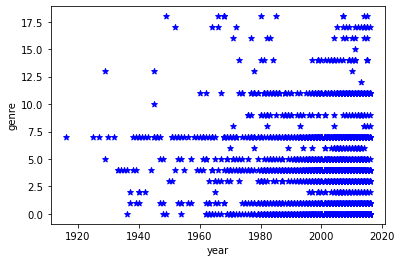

In [32]:
# to plot for castTotalLikes vs fbPosters
plt.xlabel('year')
plt.ylabel('genre')
plt.scatter(df['year'],df['genre'], color="blue" , marker="*")
plt.show()

### scaler is used to get values of μ(mu) and σ(sigma).

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Apply MultiLayerPerceptron on Neural Network.

In [34]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=500)
MLP.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)

### Predicting the output with test data

In [35]:
predictions = MLP.predict(X_test)
predictions

array([0, 7, 7, ..., 4, 4, 0], dtype=int64)

### Checking accuracy of the model

In [36]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[257   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 294   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  71   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 229   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  74   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 

C:\Users\Monisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


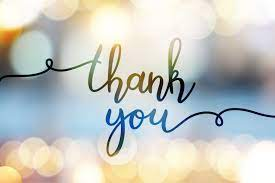